# Tutorial: Occupation-based Hamiltionians

## Introduction
The Model Hamiltonian Package is a software tool designed to generate 0, 1, and 2 electron integrals for various quantum models. In this tutorial, we'll focus on generating integrals for the occupation-based hamiltonians, specifically on Hubbard hamiltonian.

The most general occupation-number Hamiltonian we consider is the generalized Pariser-Parr-Pople (PPP) Hamiltonian, 

$$\hat{H}_{\text{PPP}} = \sum_{pq} h_{pq} a_p^\dagger a_q + \sum_p U_p \hat{n}_{p\alpha}\hat{n}_{p\beta} + \frac{1}{2}\sum_{p\ne q} \gamma_{pq} (\hat{n}_{p \alpha} + \hat{n}_{p \beta} - Q_p)(\hat{n}_{q \alpha} + \hat{n}_{q \beta} - Q_q) $$

The first terms, $h_{pq}$, could be anything, but are usually approximated at the level of [H&uuml;ckel theory](https://github.com/theochem/ModelHamiltonian/blob/main/docs/notes/huckel-model-hamiltonian.md). (In the solid-state literature, these are usually denoted $h_{pq} = t_{pq}$.) The $U_p$ term denotes the repulsion of electrons on the same atom/group site, whilst the $\gamma_{pq}$ term denotes the interaction between electrons and (possibly charged; usually $Q_p = 1$ so that the net charge of a system with one electron per site is zero) and other sites (including electrons on those sites). The $g_{pq}$ term captures interactions between electron pairs; the $g_{pq}$ term is redundant with the on-site repulsion, $g_{pp} = U_p$. 

In ModelHamiltonian package we support some special cases of this Hamiltonian:
- **Hubbard.** The [Hubbard model](https://github.com/theochem/ModelHamiltonian/blob/main/docs/notes/hubbard-model-hamiltonian.pdf) corresponds to choosing $\gamma_{pq} = 0$. It can be invoked by choosing `gamma = 0`. 
- **H&uuml;ckle.** [The H&uuml;ckle model](https://github.com/theochem/ModelHamiltonian/blob/main/docs/notes/huckel-model-hamiltonian.md) corresponds to choosing $U_p = \gamma_{pq} = 0$. It can be invoked by choosing `U_onsite = 0` and `gamma = 0`. 

## Example: Defining Hubbard Hamiltonian
There are two ways to define any occupation-based hamiltonian using the Model Hamiltonian Package:
1. Using the connectivity matrix of the lattice
2. Prividing connectivity as a list of tuples, in which atoms are specified along with connectivity type

Any occupation-base model requires energy of the orbital, $\alpha$, and interaction energy between nearest orbitals, $\beta$. By default, the energy of the orbital is set to -0.414 eV that corresponds to the energy of electron in a 2p orbital, and the interaction energy is set to -0.0533 eV that corresponds to the interaction energy between nearest 2p orbitals.

In [1]:
# import libraries
from moha import HamHub
import numpy as np

# First way to define the Hamiltonian
# two site Hubbard model

# system = [('C1', 'C2', 1)] is a list of tuples, where each tuple represents a bond
# between two atoms and the third element is the type of bond (singe or double).
# For now, we only support single bonds between carbon atoms. 
# For this type of bonds the default values of alpha and beta are -0.414 and -0.0533, respectively.
# In the future we are planning to support different types of bonds for different atoms.
system = [('C1', 'C2', 1)]
hubbard = HamHub(system,
                 alpha=-0.414, beta=-0.0533, u_onsite=np.array([1, 1]))

# Second way to define the Hamiltonian
# two site Hubbard model
connectivity = np.array([[0, 1],
                         [1, 0]])
hubbard = HamHub(connectivity,
                 alpha=-0.414, beta=-0.0533, u_onsite=np.array([1, 1]))

## Generating Integrals
The Model Hamiltonian Package can generate 0, 1, and 2 electron integrals for the PPP model Hamiltonian. The integrals are stored in a sparse matrix format, and can be used to solve the Schrödinger equation for the model.
Specifically, the integrals support the following operations:
1. Get the 0, 1, and 2 electron integrals for the PPP model;
2. Return intergrals in the form of a sparse or dense matrix;
3. Return integrals in a spin orbital or spatial basis; 

   __Note__ : Assumption is alpha and beta spinorbitals are the same;
4. Support 1-, 2-, 4- , and 8-fold symmetry such as:

    a. 1-fold symmetry: no symmetry;
    
    b. 2-fold symmetry: 

    $$g_{ij,kl} = g_{kl,ij}$$

    c. 4-fold symmetry: 

    $$g_{ij,kl} = g_{kl,ij} = g_{ji,lk} = g_{lk,ji}$$

    d. 8-fold symmetry: 

    $$g_{ij,kl} = g_{kl,ij} = g_{ji,lk} = g_{lk,ji} = g_{ji,kl} = g_{kl,ji} = g_{ij,lk} = g_{lk,ij}$$
    

In [2]:
# Example: generating 6 site Hubbard model 
# Returning electron integrals in a spatial orbital basis
# Assuming 8-fold symmetry
# Returning output as dense matrix

connectivity = np.array([[0, 1, 0, 0, 0, 1],
                         [1, 0, 1, 0, 0, 0],
                         [0, 1, 0, 1, 0, 0],
                         [0, 0, 1, 0, 1, 0],
                         [0, 0, 0, 1, 0, 1],
                         [1, 0, 0, 0, 1, 0]])
hubbard = HamHub(connectivity,
                 alpha=0, 
                 beta=-1, 
                 u_onsite=np.array([1, 1, 1, 1, 1, 1]))

e0 = hubbard.generate_zero_body_integral()
h1 = hubbard.generate_one_body_integral(dense=True, basis='spatial basis') 
h2 = hubbard.generate_two_body_integral(dense=True, basis='spatial basis', sym=8)

print("Zero energy: ", e0)
print("One body integrals in spatial basis: \n", h1)
print("Shape of two body integral in spatial basis: ", h2.shape)
print("-"*60)

# Example: generating Hubbard model in spin orbital basis
# Assuming 8-fold symmetry
# Returning output as dense matrix

h1 = hubbard.generate_one_body_integral(dense=True, basis='spinorbital basis')
h2 = hubbard.generate_two_body_integral(dense=True, basis='spinorbital basis', sym=4)

print("One body integrals in spin basis: \n", h1)
print("Shape of two body integral in spinorbital basis: ", h2.shape)

Zero energy:  0
One body integrals in spatial basis: 
 [[ 0. -1.  0.  0.  0. -1.]
 [-1.  0. -1.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  0. -1.]
 [-1.  0.  0.  0. -1.  0.]]
Shape of two body integral in spatial basis:  (6, 6, 6, 6)
------------------------------------------------------------
One body integrals in spin basis: 
 [[ 0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  0. -1.  0.]]
Shape of two 

/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


# Testing the Hubbard model

To test the ouput of the ModelHamiltoian package, we can solve the Schrödinger equation using Full CI algorithm fron the `pyscf` package.

[It can be shown](https://arxiv.org/pdf/cond-mat/0207529.pdf) that ground state energy in the half-filled one dimensional Hubbard model in the thermodynamic limit is given by Lieb-Wu formula:

$$
E_0=-4 N \int_0^{\infty} \frac{J_0(\omega) J_1(\omega)}{\omega\left(1+e^{\omega U / 2}\right)} d \omega
$$

where $N$ is the number of electrons in the chain, $J_0$ and $J_1$ are Bessel functions of the first kind, and $U$ is the on-site repulsion.

In this section, we will test the convergence of the ground state energy of the Hubbard model with the number of sites in the chain. We will compute the ground state energy obtained from the Model Hamiltonian Package with Full CI algorithm in the `pyscf` package with.

In [3]:
# Computing the energy using the Lieb-Wu formula
from scipy.integrate import quad
from scipy.special import *

U = []
E_LW = []

for Ui in np.linspace(1,10,6):
    Ei, err = quad(lambda x: j0(x) * j1(x) / (x * (1 + np.exp(Ui * x / 2))),0, 100)
    U.append(Ui)
    E_LW.append(-4*Ei)

print("Energy given by Lieb-Wu formula: ", E_LW[0])
print("Error of integration: ", err)

Energy given by Lieb-Wu formula:  -1.040368653394435
Error of integration:  8.675915091601108e-11


### Building hamiltonians with ModelHamiltonian Package and solving the Schrödinger equation with Full CI algorithm

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf import fci



E = []
norbs = np.linspace(2, 8, 4).astype(int)
for norb in norbs:
    nelec = (norb//2,norb//2)
    
    U=[]
    E_tmp=[]
    for Ui in np.linspace(1,10,6):
        # defining the system
        hubbard = HamHub([(f"C{i}", f"C{i + 1}", 1) for i in range(1, norb)] + [(f"C{norb}", f"C{1}", 1)],
                      alpha=0, beta=-1,
                      u_onsite=np.array([Ui for i in range(norb + 1)]))
        h1 = hubbard.generate_one_body_integral(basis='spatial basis', dense=True)
        h2 = hubbard.generate_two_body_integral(basis='spatial basis', dense=True, sym=4)
        
        ### calculating spectrum
        e, fcivec = fci.direct_spin1.kernel(h1, h2, norb, nelec, nroots=5,
                                            max_space=30, max_cycle=100)
        U.append(Ui)
        E_tmp.append(e[0])
    E.append(E_tmp)

/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


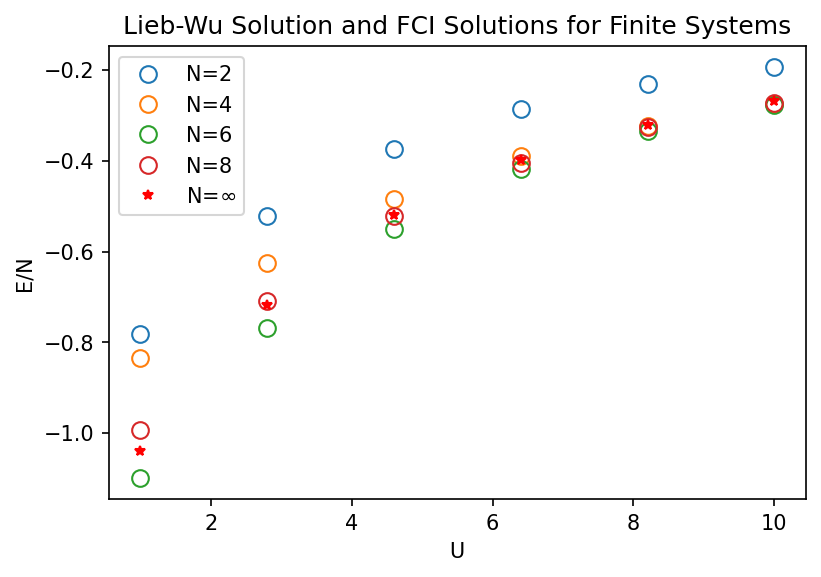

In [5]:
# plotting
plt.figure(dpi=150)

for e, norb in zip(E, norbs):
    plt.plot(U , np.array(e)/norb, 'o', label=f"N={norb}", mfc='none', markersize=8)

plt.plot(U, E_LW, '*', markersize=5, c='r', label='N=$\infty$')

plt.legend()
plt.ylabel("E/N")
plt.xlabel("U")

plt.title("Lieb-Wu Solution and FCI Solutions for Finite Systems")
plt.show();

## Saving the output of the ModelHamiltonian Package

Once we have generated the integrals using Model Hamiltonian, we can save the output in a file. This will allow us to use the integrals later without regenerating them.

There are two supported file formats:
1. `.fcidump`

    In this case the integrals are saved in the FCIDUMP format. User needs to provide a TextIO file, for example `open("<filename>", 'w')`, number of electron and spinpolarization. The lates is set to 0 by default.
2. `.npz file`

    In this case the integrals are saved in .npz file format. User needs to provide a filename. Energy shift, one-, and two-electron integrals are saved under the keys `e0`, `h1` and `h2` respectively.


In [7]:
# Example: generating 6 site Hubbard model
# Returning electron integrals in a spatial orbital basis
# Assuming 4-fold symmetry
norb = 4
hubbard = HamHub([(f"C{i}", f"C{i + 1}", 1) for i in range(1, norb)] + [(f"C{norb}", f"C{1}", 1)],
                      alpha=0, beta=-1,
                      u_onsite=np.array([Ui for i in range(norb + 1)]))
e0 = hubbard.generate_zero_body_integral()
h1 = hubbard.generate_one_body_integral(basis='spatial basis', dense=True)
h2 = hubbard.generate_two_body_integral(basis='spatial basis', dense=True, sym=4)
        
# saving the integrals as a npz file
hubbard.savez("hubbard_6.npz")
# saving the integrals as fcidump file
hubbard.save_fcidump(open('hubbard_6_site.fcidump', 'w'), nelec=6)

/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
